In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
name = 'IZOSTAL'

In [2]:
df = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-rachunek-zyskow-i-strat/'+name+',Q')[2].drop([
                                                                                    0,6,7,8,9,10,11,12,13,15,17]).set_index('Unnamed: 0')
shares = pd.read_html('https://www.biznesradar.pl/wskazniki-wartosci-rynkowej/'+name)[0].drop([0,2,3,4,5,6,7,8,9
                                                                                             ,10,11,12,13,14,15]).set_index('Unnamed: 0')


del df["Unnamed: "+str(len(df.columns))]  
del shares["Unnamed: "+str(len(shares.columns))] 

df = df.drop(df.columns[0:4], axis=1)
shares = shares.drop(shares.columns[0:(len(shares.columns)-len(df.columns))]   ,axis=1)
df.columns = df.columns.str.slice(start=2 , stop=7)
shares.columns = df.columns
     
for i in range(len(df.columns)):
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(k/k).*','')
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(r/r).*','')
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace(' ','')
    shares[str(shares.columns[i])] = shares[str(shares.columns[i])].str.replace(' ','')
    
#for j in range(8):
   # df.iloc[j] = pd.to_numeric(df.iloc[j], errors="coerce")
    
df = df.apply(pd.to_numeric, errors='ignore')
shares = shares.apply(pd.to_numeric, errors='ignore')
df

,11/Q1,11/Q2,11/Q3,11/Q4,12/Q1,12/Q2,12/Q3,12/Q4,13/Q1,13/Q2,...,18/Q4,19/Q1,19/Q2,19/Q3,19/Q4,20/Q1,20/Q2,20/Q3,20/Q4,21/Q1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Przychody ze sprzedaży,55226,66917,58288,79301,128285,105684,102671,122781,107988,88803,...,229824,218702,171152,165934,214543,205719,212526,225714,216092,255724
Techniczny koszt wytworzenia produkcji sprzedanej,46981,56042,50240,67683,116756,95578,89808,105780,97250,79604,...,224688,205891,158514,152696,198933,186482,192728,207522,198406,235828
Koszty sprzedaży,624,845,840,1168,1694,387,2071,3648,1823,1624,...,-2618,2776,3198,3439,3674,5698,8635,7219,7306,7382
Koszty ogólnego zarządu,2471,2467,2325,2917,3090,2746,2970,3589,2872,3126,...,6149,5225,5600,5386,6804,5406,6405,5807,7366,6310
Zysk ze sprzedaży,5150,7563,4883,7533,6745,6973,7822,9764,6043,4449,...,1605,4810,3840,4413,5132,8133,4758,5166,3014,6204
Zysk przed opodatkowaniem,4962,7566,5599,5646,7211,6091,5889,6015,6087,5105,...,4140,5196,4048,3155,3562,4992,5604,4253,4289,6699
Zysk netto,4010,6109,4517,4498,5822,4907,4720,4857,4881,4135,...,3345,4154,3265,2589,3023,3913,4581,3267,3416,5413
EBITDA,6321,8795,5969,8131,7762,8868,9269,7868,7674,5989,...,3475,6979,6479,6897,3386,10826,7063,6629,5263,9984


In [3]:
class ZIS:
    def __init__(self , df):
        self.time = df.columns
        self.shares = shares.iloc[0]
        self.year = [ self.time[i] for i in range(3,len(self.time),4)]
        self.year = np.append(self.year , '21/Q4')
        self.sell_revenue = df.iloc[0]
        self.Revenue_year = [np.sum(self.sell_revenue[i:i+4])/1000000 for i in range(0,len(self.sell_revenue),4)] 
        self.production_costs = df.iloc[1]
        self.sell_costs = df.iloc[2]
        self.board_costs = df.iloc[3]
        self.sell_profit = df.iloc[4]
        self.gross_profit = df.iloc[5]
        self.net_profit = df.iloc[6]
        self.net_profit_share = self.net_profit/self.shares*1000
        self.net_profit_share_year = [ np.sum(self.net_profit_share[i:i+4]) for i in range(0,len(self.net_profit_share),4) ]
        
        self.Revenue_1Q = [ self.sell_revenue[i]/1000 for i in range(0,len(self.sell_revenue),4)]
        self.Revenue_2Q = [ self.sell_revenue[i]/1000 for i in range(1,len(self.sell_revenue),4)]
        self.Revenue_3Q = [ self.sell_revenue[i]/1000 for i in range(2,len(self.sell_revenue),4)]
        self.Revenue_4Q = [ self.sell_revenue[i]/1000 for i in range(3,len(self.sell_revenue),4)]
        
        self.gross_profit_1Q = [ self.gross_profit[i]/1000 for i in range(0,len(self.sell_revenue),4)]
        self.gross_profit_2Q = [ self.gross_profit[i]/1000 for i in range(1,len(self.sell_revenue),4)]
        self.gross_profit_3Q = [ self.gross_profit[i]/1000 for i in range(2,len(self.sell_revenue),4)]
        self.gross_profit_4Q = [ self.gross_profit[i]/1000 for i in range(3,len(self.sell_revenue),4)]
        
        
    def Revenue(self):
        self.fig = plt.figure(figsize = (20,8) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)  
        
        plt.bar(self.time , self.sell_revenue/self.shares*1000 , label = 'sell_revenue' )
        plt.plot(self.time , self.production_costs/self.shares*1000 , label = 'production_costs', color ='saddlebrown')
        plt.plot(self.time , self.sell_costs/self.shares*1000 , label = 'sell_costs', color='crimson')
        plt.plot(self.time , self.board_costs/self.shares*1000 , label = 'board_costs', color='limegreen')
        plt.xticks(rotation = 50)
        plt.yticks(fontsize = 12)
        self.ax.legend(loc = 'best' , fontsize = 12)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.spines["bottom"].set_visible(False)
        self.ax.spines["left"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_ylabel('Sell revenue/production costs', fontsize=15)
        plt.bar(self.time, self.sell_revenue/self.production_costs)
        plt.xticks(rotation = 50)
        
        self.fig = plt.figure(figsize = (15,8) , dpi=80)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_ylabel('mld zł')
        plt.bar(self.year, self.Revenue_year)
        
        self.fig = plt.figure(figsize = (15,8) , dpi=80)
        self.ax = plt.subplot(221)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(0,len(self.sell_revenue),4)] , self.Revenue_1Q)
        self.ax.plot([self.time[i] for i in range(0,len(self.sell_revenue),4)] , self.gross_profit_1Q)
        
        self.ax2.plot([self.time[i] for i in range(0,len(self.sell_revenue),4)] 
                      ,[ self.gross_profit_1Q[i]/self.Revenue_1Q[i]*100 for i in range(0,len(self.Revenue_1Q))],linestyle='--')         
        self.ax = plt.subplot(222)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(1,len(self.sell_revenue),4)] , self.Revenue_2Q)
        self.ax.plot([self.time[i] for i in range(1,len(self.sell_revenue),4)] , self.gross_profit_2Q)
        
        self.ax2.plot([self.time[i] for i in range(1,len(self.sell_revenue),4)] 
                      , [ self.gross_profit_2Q[i]/self.Revenue_2Q[i]*100 for i in range(0,len(self.Revenue_2Q))],linestyle='--')
        self.ax = plt.subplot(223)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(2,len(self.sell_revenue),4)] , self.Revenue_3Q)
        self.ax.plot([self.time[i] for i in range(2,len(self.sell_revenue),4)] , self.gross_profit_3Q)
        
        self.ax2.plot([self.time[i] for i in range(2,len(self.sell_revenue),4)] 
                      , [ self.gross_profit_3Q[i]/self.Revenue_3Q[i]*100 for i in range(0,len(self.Revenue_3Q))],linestyle='--')
        self.ax = plt.subplot(224)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(3,len(self.sell_revenue),4)] , self.Revenue_4Q)
        self.ax.plot([self.time[i] for i in range(3,len(self.sell_revenue),4)] , self.gross_profit_4Q)
        
        self.ax2.plot([self.time[i] for i in range(3,len(self.sell_revenue),4)] 
                      , [ self.gross_profit_4Q[i]/self.Revenue_4Q[i]*100 for i in range(0,len(self.Revenue_4Q))],linestyle='--')
        self.fig.tight_layout(pad=3)
    
    def margins(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.spines["bottom"].set_visible(False)
        self.ax.spines["left"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)

        plt.plot(self.time , self.sell_profit/self.sell_revenue*100, label='sell margin', color='darkviolet',marker='o')
        plt.plot(self.time , self.net_profit/self.sell_revenue*100, label='net margin', color='forestgreen',marker='o')
        plt.xticks(rotation =50)
        plt.legend(loc='best', fontsize=14)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.spines["bottom"].set_visible(False)
        self.ax.spines["left"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)

        plt.plot(self.time , (self.sell_profit-self.net_profit)/self.sell_revenue*100)
        plt.xticks(rotation =50)
        plt.tight_layout(pad = 4 );
    
        
    def earnings(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Earnings per share [zł]')
   
        self.polynomial_coeff = np.polyfit([i for i in range(0,len(self.time))], self.net_profit_share, 1)
        self.curve = np.polyval(self.polynomial_coeff, [i for i in range(0,len(self.time))])
       
        self.net_profit_mean = [ np.sum(self.net_profit_share[0:i])/i
                   for i in range(1,len(self.net_profit)+1) ] 
        self.variance = [np.sum(self.net_profit_share[0:i]-self.net_profit_mean[i])**2/(i+1) for i in range(0,len(self.net_profit_share)) ]
        self.sd = np.sqrt(self.variance)

        plt.vlines(x=self.time , ymin =0 ,ymax = self.net_profit_share , color='lime', linewidth=2) 
        plt.scatter(self.time , self.net_profit_share , s =100 , color = 'lime')
        plt.plot(self.time , self.net_profit_mean , color= 'darkviolet')
        plt.fill_between(self.time , self.net_profit_mean -self.sd , self.net_profit_mean+self.sd , alpha=0.3)
        plt.plot(self.time, self.curve)

        plt.xticks(rotation = 50)
        plt.yticks(fontsize = 12)
        
        self.ax=plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        j = 3
        while(j<=len(self.shares)):
            self.coefficients = np.polyfit([j-3,j-2,j-1], self.net_profit_share[j-3:j], 1)
            self.coefficients_mean = np.polyfit([j-3,j-2,j-1], self.net_profit_mean[j-3:j], 1)
            self.curve = np.polyval(self.coefficients,[j-3,j-2,j-1])
            self.curve_mean = np.polyval(self.coefficients_mean,[j-3,j-2,j-1])
            if self.coefficients[0]<=0:
                self.color = 'red'
            else:
                self.color = 'green'
            plt.plot(self.time[j-3:j], self.curve, color=self.color)
            plt.plot(self.time[j-3:j], self.curve_mean, color='black')
            j = j+1
        plt.xticks(rotation=50)
            
    def earnings_year(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Earnings per share [zł]') 
        self.ax2 = self.ax.twinx()
        self.ax2.set_ylim([-100,100])
        self.net_profit_year_diff = [0]
        self.net_profit_year_diff = np.append(self.net_profit_year_diff,np.diff(self.net_profit_share_year)/self.net_profit_share_year[0:len(self.year)-1]*100)
        
        self.ax.vlines(x=self.year , ymin =0 ,ymax = self.net_profit_share_year , color='lime',alpha=0.5, linewidth=4) 
        self.ax.scatter(self.year , self.net_profit_share_year , s =65 , color = 'lime')

        self.net_profit_mean_year = [ np.sum(self.net_profit_share_year[0:i])/i
                   for i in range(1,len(self.net_profit_share_year)+1) ] 
        self.variance_year = [np.sum(self.net_profit_share_year[0:i]-self.net_profit_mean_year[i])**2/(i+1) 
                              for i in range(0,len(self.net_profit_share_year)) ]
        self.sd_year = np.sqrt(self.variance_year)
        
        self.ax.plot(self.year , self.net_profit_mean_year,color='navy')
        self.ax.fill_between(self.year , self.net_profit_mean_year -self.sd_year , self.net_profit_mean_year+self.sd_year , alpha=0.3 )
        self.ax2.plot(self.year, self.net_profit_year_diff, linestyle='--')
        plt.xticks(rotation = 50)
        plt.yticks(fontsize = 12)
        
    def tax(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.spines["bottom"].set_visible(False)
        self.ax.spines["left"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_ylim([-100,100])
        
        plt.plot(self.time , (100 - self.net_profit/self.gross_profit*100) )
        plt.axhline( np.mean((100 - self.net_profit/self.gross_profit*100)) , linestyle ='--')
        plt.xticks(rotation=50)

None

None

None

None

None

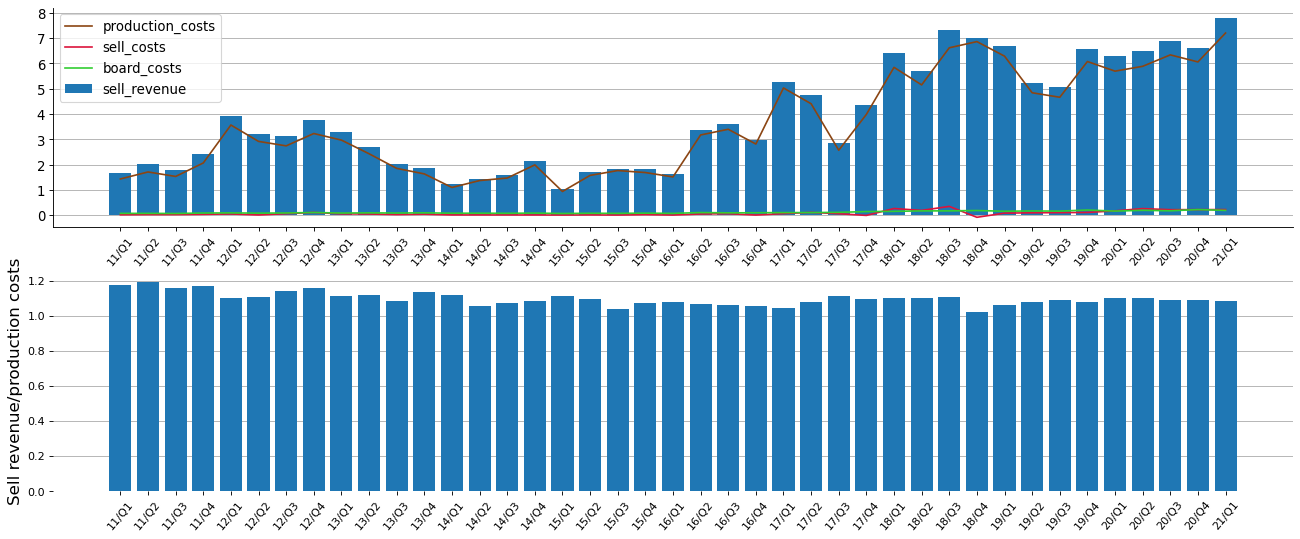

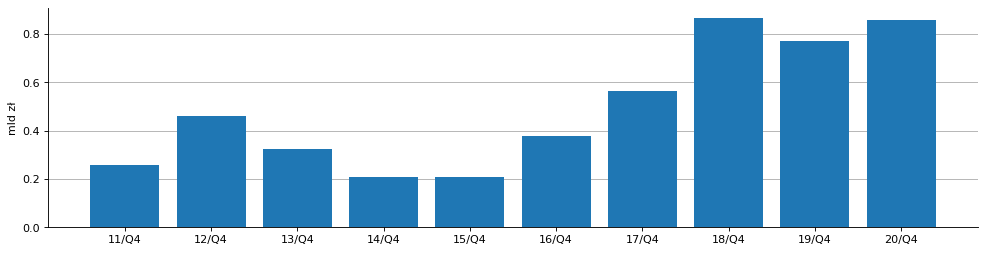

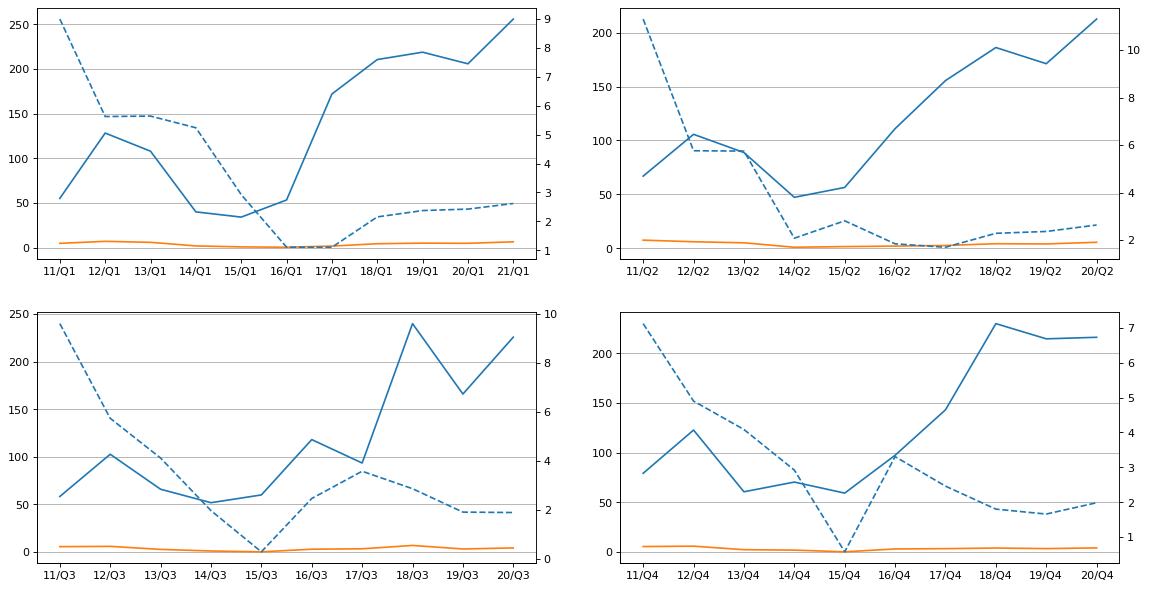

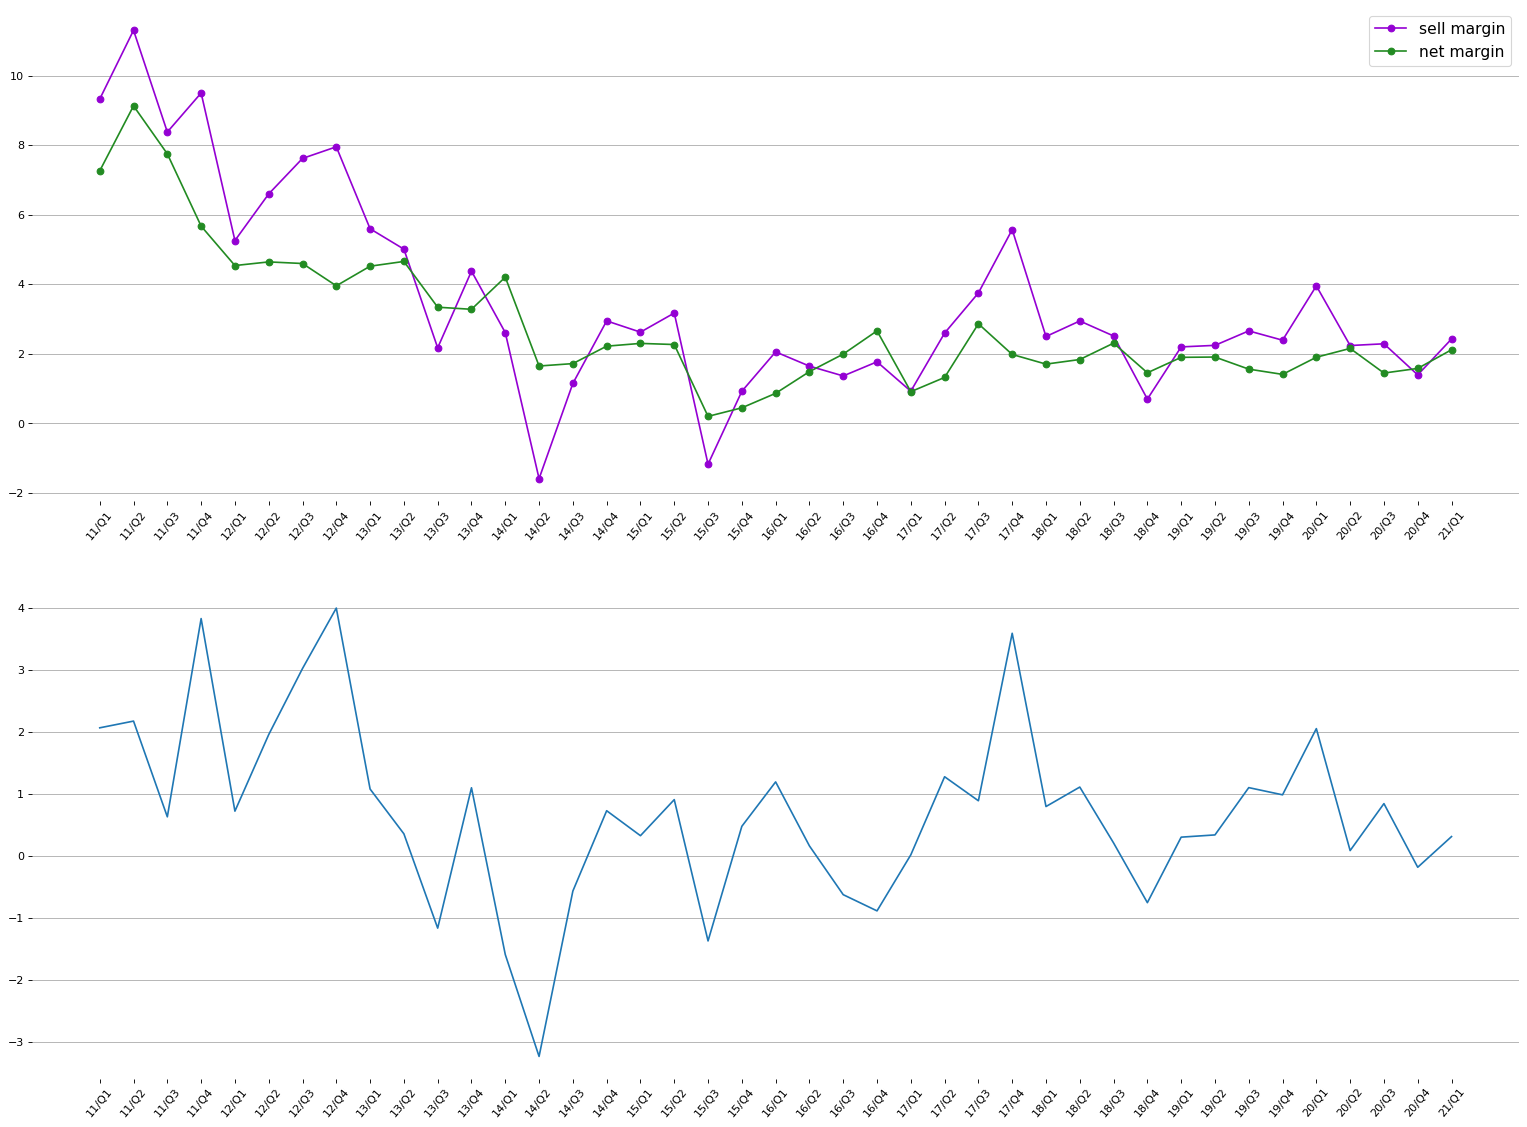

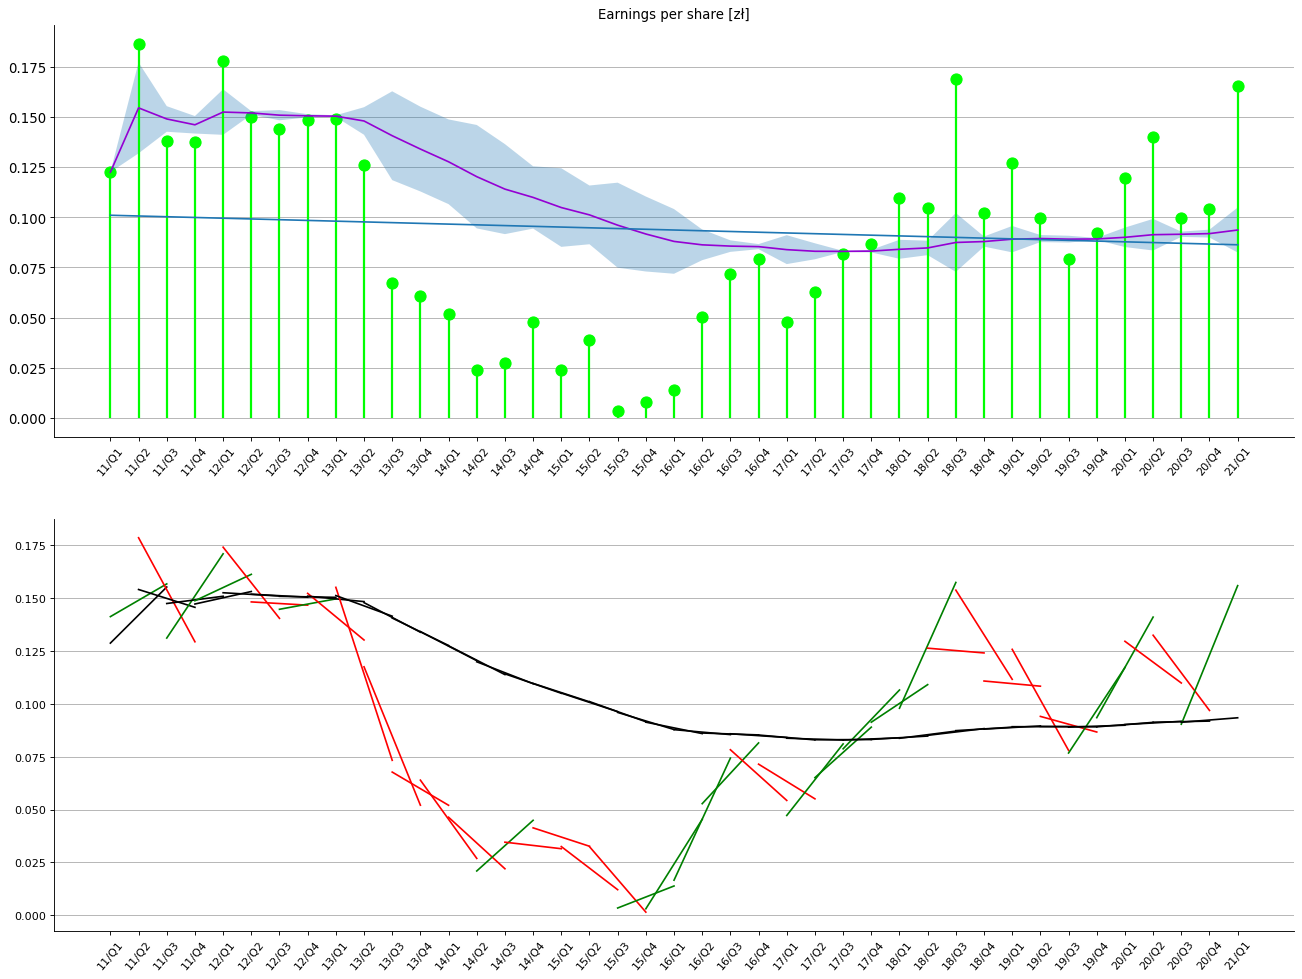

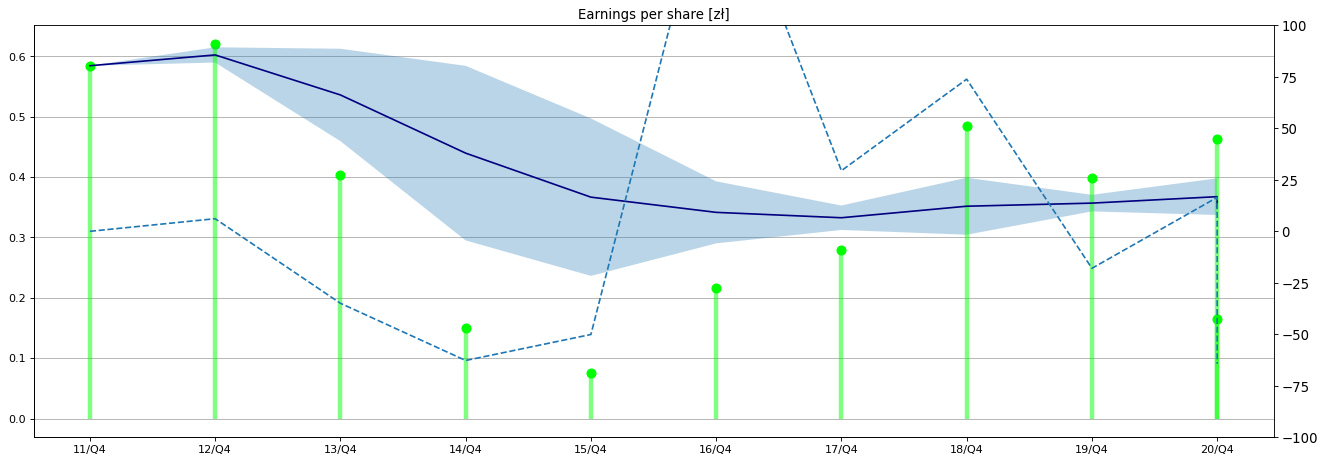

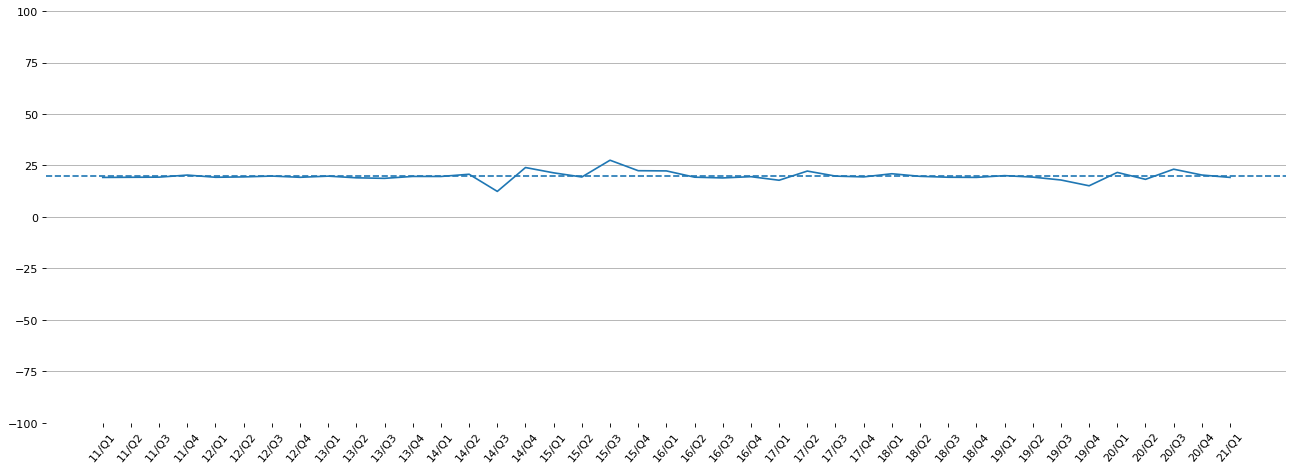

In [4]:
fin = ZIS(df) 
display(fin.Revenue())
display(fin.margins())
display(fin.earnings())
display(fin.earnings_year())
display(fin.tax())